# Test installation

In [36]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StringType, IntegerType, FloatType
from pathlib import Path
from datetime import datetime
import json
import http.client
import requests
import sys
import pandas
import os
import shutil

In [2]:
spark = SparkSession.builder.appName("TestInstallation").getOrCreate()
sqlContext = SparkSession(spark)
spark.sparkContext.setLogLevel("WARN")

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/09/17 00:25:46 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [3]:
spark.sparkContext.getConf().getAll()

[('spark.driver.host', '58ee2d3dbe49'),
 ('spark.sql.warehouse.dir', 'file:/opt/spark/work-dir/spark-warehouse'),
 ('spark.app.id', 'local-1694910347207'),
 ('spark.rdd.compress', 'True'),
 ('spark.driver.port', '44417'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.master', 'local[*]'),
 ('spark.submit.pyFiles', ''),
 ('spark.executor.id', 'driver'),
 ('spark.app.name', 'TestInstallation'),
 ('spark.app.startTime', '1694910346495'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true')]

In [18]:
data = Path("/opt/spark/data")

In [43]:
gdp_file = str(data / 'gdp.csv')
schema = StructType() \
    .add("CountryName",StringType(),True) \
    .add("CountryCode",StringType(),True) \
    .add("Year",IntegerType(),True) \
    .add("Value",FloatType(),True)

In [44]:
df = spark.read.format("csv") \
    .option("header",True) \
    .schema(schema) \
    .load(gdp_file)
df.printSchema()

root
 |-- CountryName: string (nullable = true)
 |-- CountryCode: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Value: float (nullable = true)



In [41]:
df.show(truncate=False)

+------------+------------+----+-------------+
|Country Name|Country Code|Year|Value        |
+------------+------------+----+-------------+
|Arab World  |ARB         |1968|2.5760684E10 |
|Arab World  |ARB         |1969|2.84342026E10|
|Arab World  |ARB         |1970|3.13854996E10|
|Arab World  |ARB         |1971|3.6426912E10 |
|Arab World  |ARB         |1972|4.3316056E10 |
|Arab World  |ARB         |1973|5.5018394E10 |
|Arab World  |ARB         |1974|1.05145803E11|
|Arab World  |ARB         |1975|1.16337025E11|
|Arab World  |ARB         |1976|1.44846176E11|
|Arab World  |ARB         |1977|1.67308329E11|
|Arab World  |ARB         |1978|1.83555539E11|
|Arab World  |ARB         |1979|2.48646205E11|
|Arab World  |ARB         |1980|3.38177458E11|
|Arab World  |ARB         |1981|3.485928E11  |
|Arab World  |ARB         |1982|3.24328751E11|
|Arab World  |ARB         |1983|3.03962554E11|
|Arab World  |ARB         |1984|3.07940786E11|
|Arab World  |ARB         |1985|3.0389361E11 |
|Arab World  

In [49]:
poland = df.filter(df.CountryCode == "POL").select("Year", "Value")

In [50]:
poland.show()

+----+-------------+
|Year|        Value|
+----+-------------+
|1990|  6.597775E10|
|1991| 8.5500936E10|
|1992| 9.4337049E10|
|1993| 9.6045646E10|
|1994|1.10803395E11|
|1995|1.42137328E11|
|1996|1.59942885E11|
|1997|1.59117804E11|
|1998|1.74388265E11|
|1999|1.69717678E11|
|2000|1.71885593E11|
|2001|1.90521262E11|
|2002|1.98680642E11|
|2003|2.17518637E11|
|2004|2.55102255E11|
|2005|3.06134647E11|
|2006|3.44826446E11|
|2007|4.29249659E11|
|2008|5.33815788E11|
|2009|4.40346575E11|
+----+-------------+
only showing top 20 rows



23/09/17 01:24:45 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Country Code, Year, Value
 Schema: CountryCode, Year, Value
Expected: CountryCode but found: Country Code
CSV file: file:///opt/spark/data/gdp.csv


In [52]:
%pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/08/73/a4af3493a81d6e5e1fdb4c72f4d3573a7e94b60f7c2c69ab0275fdc7cd8e/matplotlib-3.7.3-cp38-cp38-manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/71/7f20855592cc929bc206810432b991ec4c702dc26b0567b132e52c85536f/contourpy-1.1.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/91/f1/2379b341206a6e7e12f9d7c406ea03f0e0386eafa7913a47d8cc931cacf4/fonttools-4.42.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/151.0 kB 3.4 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency information for kiwisolver>=1.0.1 from https://files.pythonhosted.org/packages/d2/55/7021ffcc8cb26a520bb051aa0a3d08daf200cde945e5863d5768161

23/09/17 01:32:56 WARN CSVHeaderChecker: CSV header does not conform to the schema.
 Header: Country Code, Year, Value
 Schema: CountryCode, Year, Value
Expected: CountryCode but found: Country Code
CSV file: file:///opt/spark/data/gdp.csv


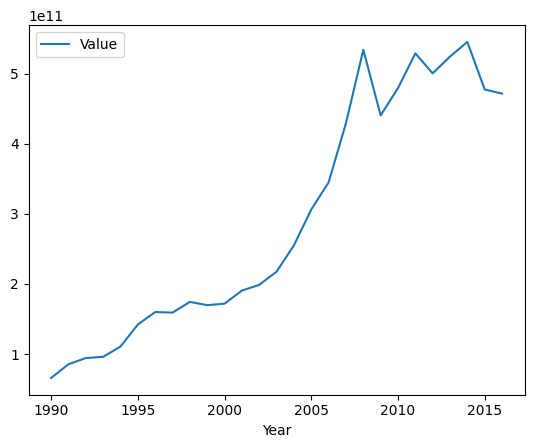

In [57]:
import matplotlib.pyplot as plt
pol = poland.toPandas()
pol.set_index('Year').plot()

plt.show()